In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset

In [2]:
df = pd.read_csv("expanded_car_price_prediction.csv")


# Selecting numerical and categorical features

In [3]:
num_features = ["Car_Age", "Mileage", "Engine_Size", "Fuel_Efficiency", "Previous_Owners",
                "Resale_Value", "Demand_Trend", "Accident_History", "Car_Condition_Score", "Service_History"]
cat_features = ["Brand", "Model", "Fuel_Type", "Transmission"]


# One-hot encoding categorical features

In [4]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_cats = encoder.fit_transform(df[cat_features])
encoded_cat_columns = encoder.get_feature_names_out(cat_features)


# Creating final dataset for training

In [5]:
X = np.hstack((df[num_features].values, encoded_cats))
y = df["Price"].values


# Splitting dataset into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear Regression model

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#Making predictions on training dataset

In [8]:
x_pred = linear_model.predict(X_train)

#Evaluating the model

In [9]:
mae = mean_absolute_error(y_train, x_pred)
mse = mean_squared_error(y_train, x_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, x_pred)

#Display results

In [10]:
print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")

MAE: 7861.851386954566, RMSE: 9949.74359766959, R2 Score: 0.8680720375974796


#Scatter plot for Actual vs Predicted Prices

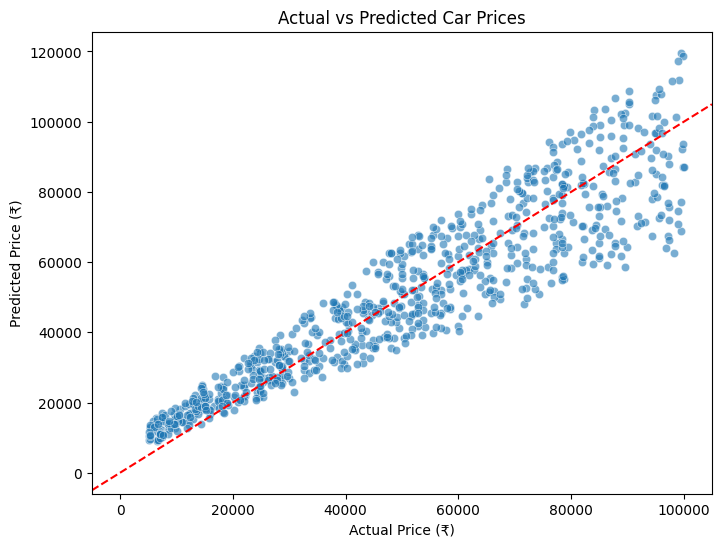

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=x_pred, alpha=0.6)
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Car Prices")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Reference Line
plt.show()

# Making predictions on test data

In [12]:
y_pred = linear_model.predict(X_test)

# Evaluating the model

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results

In [14]:
print(f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}")

MAE: 8116.199703940643, RMSE: 10356.508603563127, R2 Score: 0.8533168768858143


# Scatter plot for Actual vs Predicted Prices

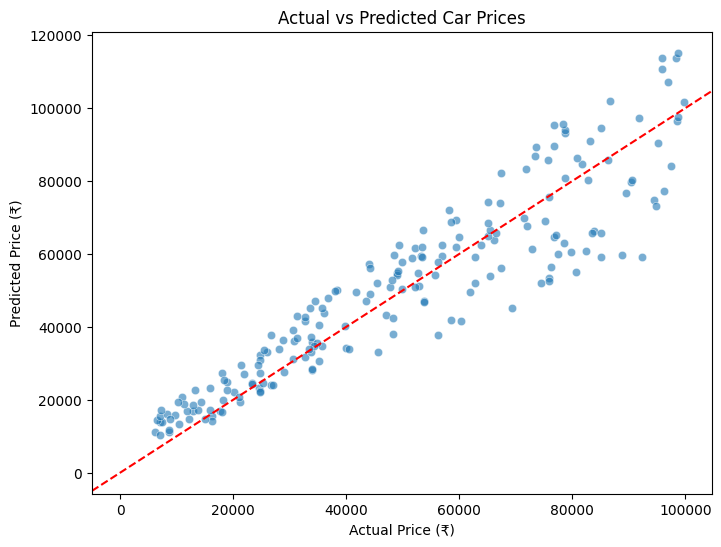

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted Car Prices")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Reference Line
plt.show()

# Predictions on the training set

In [16]:
y_train_pred = linear_model.predict(X_train)

# Calculate MAE for training set

In [17]:
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE for training set

In [18]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R² Score for training set

In [19]:
r2_train = r2_score(y_train, y_train_pred)

# Predictions on the test set

In [20]:
y_test_pred = linear_model.predict(X_test)

# Calculate MAE for test set

In [21]:
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate RMSE for test set

In [22]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R² Score for test set

In [23]:
r2_test = r2_score(y_test, y_test_pred)

# Data for plotting

In [24]:
metrics = ["MAE", "RMSE", "R² Score"]
train_values = [mae_train, rmse_train, r2_train]
test_values = [mae_test, rmse_test, r2_test]

# Print numerical comparison

In [25]:
print("Training Performance:")
print(f"MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R² Score: {r2_train:.4f}")
print("\nTest Performance:")
print(f"MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R² Score: {r2_test:.4f}")

Training Performance:
MAE: 7861.85, RMSE: 9949.74, R² Score: 0.8681

Test Performance:
MAE: 8116.20, RMSE: 10356.51, R² Score: 0.8533


# Bar plot for Training vs Test errors

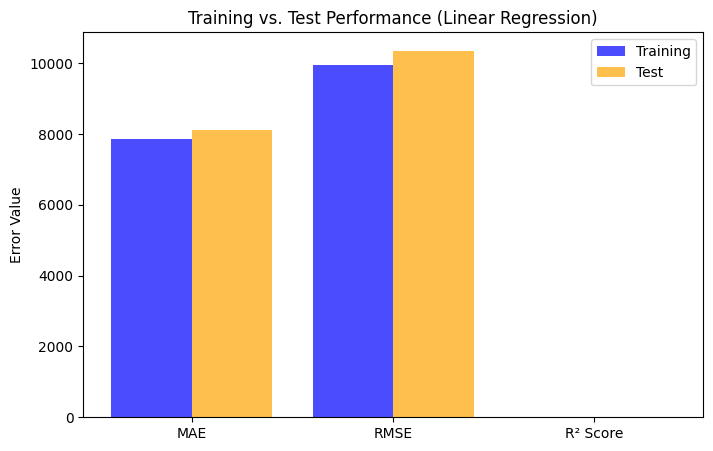

In [26]:
plt.figure(figsize=(8, 5))
x = range(len(metrics))

plt.bar(x, train_values, width=0.4, label="Training", color="blue", alpha=0.7)
plt.bar([i + 0.4 for i in x], test_values, width=0.4, label="Test", color="orange", alpha=0.7)

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel("Error Value")
plt.title("Training vs. Test Performance (Linear Regression)")
plt.legend()
plt.show()

# Line plot for R² Score

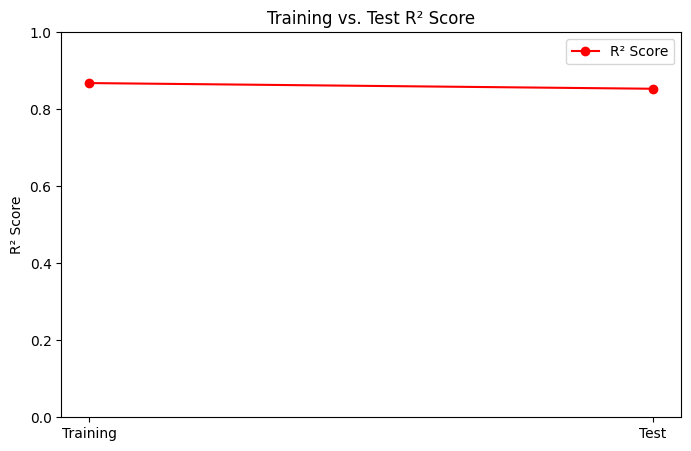

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(["Training", "Test"], [r2_train, r2_test], marker="o", linestyle="-", color="red", label="R² Score")
plt.ylim(0, 1)  # Keeping the scale 0 to 1 for better visibility
plt.ylabel("R² Score")
plt.title("Training vs. Test R² Score")
plt.legend()
plt.show()

# Initialize Lasso model (alpha controls regularization strength)

In [28]:
lasso_model = Lasso(alpha=0.1)  # You can tune alpha


# Train the model

In [29]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

# Predictions

In [30]:
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Performance Metrics

In [31]:
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print Results

In [32]:
print("📊 **Lasso Regression Performance** 📊")
print(f"MAE (Train): {mae_train_lasso:.2f}, MAE (Test): {mae_test_lasso:.2f}")
print(f"RMSE (Train): {rmse_train_lasso:.2f}, RMSE (Test): {rmse_test_lasso:.2f}")
print(f"R² Score (Train): {r2_train_lasso:.4f}, R² Score (Test): {r2_test_lasso:.4f}")

📊 **Lasso Regression Performance** 📊
MAE (Train): 7861.87, MAE (Test): 8116.15
RMSE (Train): 9949.74, RMSE (Test): 10356.43
R² Score (Train): 0.8681, R² Score (Test): 0.8533


# Check Feature Importance (Lasso shrinks some coefficients to zero)

In [33]:
feature_importance = pd.Series(lasso_model.coef_, index=np.arange(X_train.shape[1])) # Use a range of numbers as index
selected_features = feature_importance[feature_importance != 0]
removed_features = feature_importance[feature_importance == 0]

print("\n🎯 **Selected Features (Not Shrunk to Zero):**")
print(selected_features)

print("\n🚫 **Removed Features (Shrunk to Zero):**")
print(removed_features)



🎯 **Selected Features (Not Shrunk to Zero):**
0      -22.103732
1       -0.013446
2     -201.988738
3      -59.464326
4       52.620153
5        1.436325
6      388.410910
7      357.039366
8      -21.973598
9       70.408616
10     687.219822
11    -661.127906
12    -378.944125
14   -1183.673860
15   -2518.627863
16    1285.118232
17     869.678977
18    1577.168276
19    -355.535149
21     368.759810
22    -119.780672
23     126.533292
24     142.800863
25    -730.630846
26    -327.872254
27    -376.239331
28     106.521622
29      75.664009
31      -0.127343
32     123.646127
dtype: float64

🚫 **Removed Features (Shrunk to Zero):**
13    0.0
20   -0.0
30   -0.0
dtype: float64


# Comparison Data

In [34]:
models = ["Linear Regression", "Lasso Regression"]
mae_values = [mae_test, mae_test_lasso]
rmse_values = [rmse_test, rmse_test_lasso]
r2_values = [r2_test, r2_test_lasso]

# 📊 Table of Results

In [35]:
comparison_df = pd.DataFrame({
    "Model": models,
    "MAE": mae_values,
    "RMSE": rmse_values,
    "R² Score": r2_values
})

print("📌 **Comparison of Linear vs. Lasso Regression:**")
print(comparison_df)

📌 **Comparison of Linear vs. Lasso Regression:**
               Model          MAE          RMSE  R² Score
0  Linear Regression  8116.199704  10356.508604  0.853317
1   Lasso Regression  8116.145625  10356.430480  0.853319


# 📉 Bar Chart - MAE & RMSE

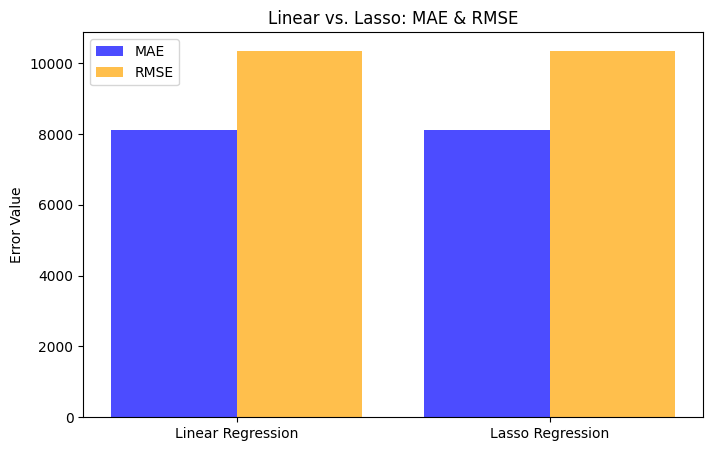

In [36]:
plt.figure(figsize=(8, 5))
x = range(len(models))

plt.bar(x, mae_values, width=0.4, label="MAE", color="blue", alpha=0.7)
plt.bar([i + 0.4 for i in x], rmse_values, width=0.4, label="RMSE", color="orange", alpha=0.7)

plt.xticks([i + 0.2 for i in x], models)
plt.ylabel("Error Value")
plt.title("Linear vs. Lasso: MAE & RMSE")
plt.legend()
plt.show()

# 📈 Line Plot for R² Score

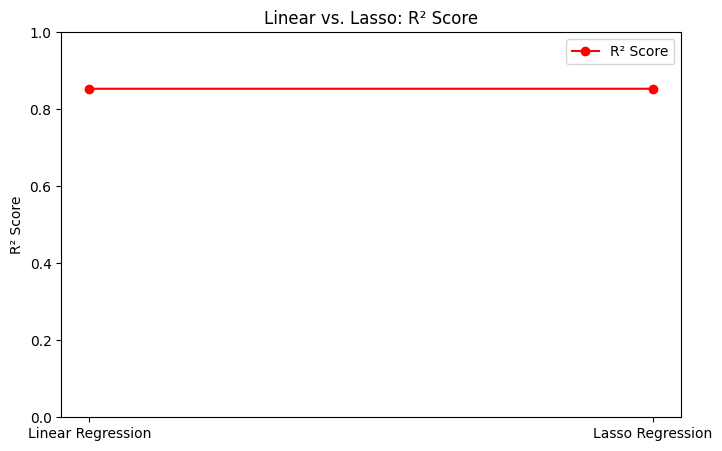

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(models, r2_values, marker="o", linestyle="-", color="red", label="R² Score")
plt.ylim(0, 1)  # Keeping scale 0 to 1
plt.ylabel("R² Score")
plt.title("Linear vs. Lasso: R² Score")
plt.legend()
plt.show()

In [38]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [39]:
df["Price_Category"] = pd.qcut(df["Price"], q=3, labels=["Low", "Medium", "High"])

# Define features and target
X = df.drop(columns=["Price", "Price_Category"])
y = df["Price_Category"]

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Train classification models
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel="rbf")

In [43]:
# Fit models
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC()

In [44]:
# Make predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

In [45]:
# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [46]:
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")
print(f"Random Forest Accuracy: {accuracy_rf:.2%} (Best)")
print(f"SVM Accuracy: {accuracy_svm:.2%}")

Decision Tree Accuracy: 80.00%
Random Forest Accuracy: 86.33% (Best)
SVM Accuracy: 78.67%


Text(0.5, 1.0, 'Comparison of Classification Model Accuracy')

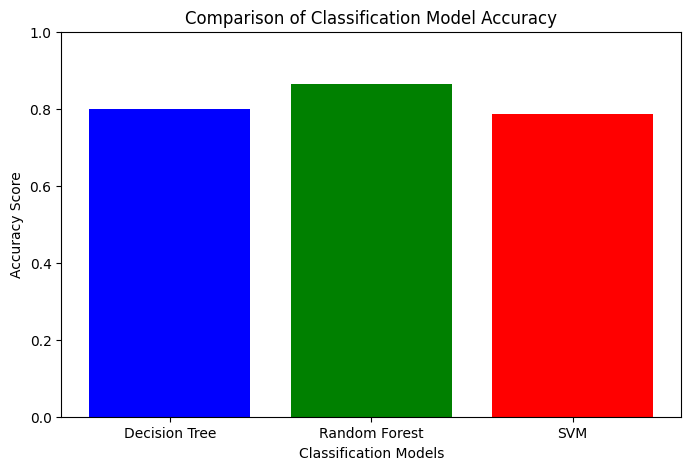

In [47]:
# Plot bar chart for accuracy comparison
models = ["Decision Tree", "Random Forest", "SVM"]
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_svm]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel("Classification Models")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title("Comparison of Classification Model Accuracy")

In [48]:
X = df[num_features + cat_features]
X = pd.get_dummies(X, drop_first=True)
y = df["Price"]

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores_rf = []
rmse_scores_rf = []

In [54]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    r2_scores_rf.append(r2_rf)
    rmse_scores_rf.append(rmse_rf)


In [55]:
print("Random Forest - Average R² score:", np.mean(r2_scores_rf))
print("Random Forest - Average RMSE:", np.mean(rmse_scores_rf))

Random Forest - Average R² score: 0.8973214554965565
Random Forest - Average RMSE: 8744.3047655968


In [56]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

r2_scores_rf = []
rmse_scores_rf = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    r2_scores_rf.append(r2_rf)
    rmse_scores_rf.append(rmse_rf)

print("K=3 -> R²:", np.mean(r2_scores_rf), "| RMSE:", np.mean(rmse_scores_rf))


K=3 -> R²: 0.8922057082833658 | RMSE: 8967.91535393992


In [59]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
r2_scores_rf = []
rmse_scores_rf = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    r2_scores_rf.append(r2_rf)
    rmse_scores_rf.append(rmse_rf)

print("K=7 -> R²:", np.mean(r2_scores_rf), "| RMSE:", np.mean(rmse_scores_rf))


K=7 -> R²: 0.8965101620358158 | RMSE: 8767.608245278027


In [60]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scores_rf = []
rmse_scores_rf = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

    r2_scores_rf.append(r2_rf)
    rmse_scores_rf.append(rmse_rf)

print("K=10 -> R²:", np.mean(r2_scores_rf), "| RMSE:", np.mean(rmse_scores_rf))

K=10 -> R²: 0.8967041026931163 | RMSE: 8715.92635014134


In [61]:
# K-fold values and corresponding scores
k_values = [3, 5, 7, 10]
r2_scores = [0.8922, 0.8973, 0.8965, 0.8967]
rmse_scores = [8967.91, 8744.30, 8767.61, 8715.93]

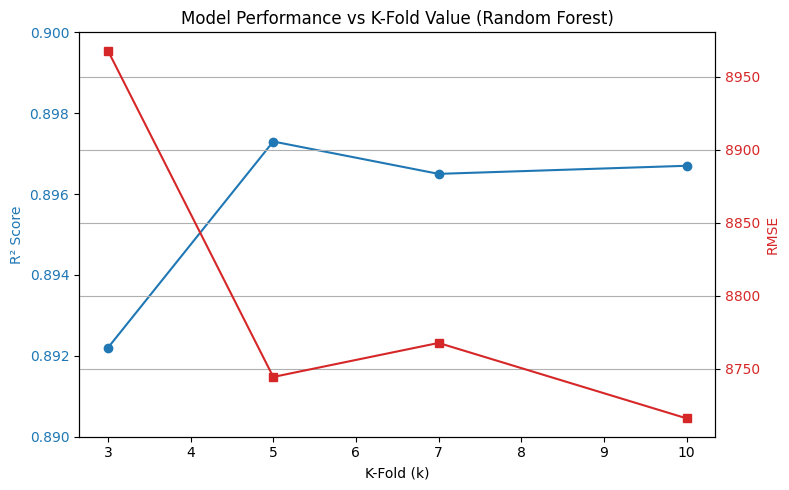

In [62]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('K-Fold (k)')
ax1.set_ylabel('R² Score', color=color)
ax1.plot(k_values, r2_scores, marker='o', color=color, label='R² Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.89, 0.90)

ax2 = ax1.twinx()  # instantiate a second y-axis
color = 'tab:red'
ax2.set_ylabel('RMSE', color=color)
ax2.plot(k_values, rmse_scores, marker='s', color=color, label='RMSE')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Model Performance vs K-Fold Value (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()